<a href="https://colab.research.google.com/github/GustaFTW/TensorFlow-ZTM/blob/main/section3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Suck as the camera of a self-driving car recognizing the car in the front.

## Get the data

The images we're working with are from the Food101 dataset (101 differente classes of food)

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook.

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-07 21:49:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.6MB/s    in 5.5s    

2022-12-07 21:49:34 (19.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many sampples of your data.



In [ ]:
!ls pizza_steak

test  train


In [ ]:
! ls pizza_steak/train

pizza  steak


In [ ]:
! ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmaticaly
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names =np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from subdirections
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

['1507039.jpg']
Image shape: (384, 512, 3)


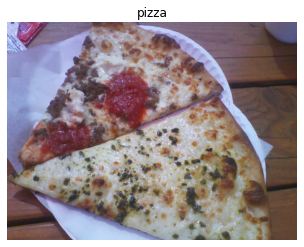

In [ ]:
# view a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 19,  12,   6],
        [ 20,  13,   7],
        [ 21,  14,   8],
        ...,
        [232, 228, 227],
        [232, 228, 227],
        [233, 229, 228]],

       [[ 21,  14,   8],
        [ 22,  15,   9],
        [ 23,  16,  10],
        ...,
        [231, 227, 226],
        [232, 228, 227],
        [233, 229, 228]],

       [[ 22,  15,   9],
        [ 22,  15,   9],
        [ 23,  16,  10],
        ...,
        [231, 227, 226],
        [231, 227, 226],
        [232, 228, 227]],

       ...,

       [[155, 133, 120],
        [161, 139, 126],
        [162, 140, 127],
        ...,
        [133, 116, 108],
        [132, 115, 108],
        [132, 115, 108]],

       [[152, 130, 116],
        [156, 134, 120],
        [160, 138, 125],
        ...,
        [133, 116, 108],
        [132, 115, 107],
        [132, 115, 108]],

       [[154, 132, 118],
        [154, 132, 118],
        [159, 137, 123],
        ...,
        [134, 117, 10

In [ ]:
# View the image shape
tf.shape(img) # returns width, height, colour channels

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([512, 512,   3], dtype=int32)>

> **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also known as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.0745098 , 0.04705882, 0.02352941],
        [0.07843137, 0.05098039, 0.02745098],
        [0.08235294, 0.05490196, 0.03137255],
        ...,
        [0.90980392, 0.89411765, 0.89019608],
        [0.90980392, 0.89411765, 0.89019608],
        [0.91372549, 0.89803922, 0.89411765]],

       [[0.08235294, 0.05490196, 0.03137255],
        [0.08627451, 0.05882353, 0.03529412],
        [0.09019608, 0.0627451 , 0.03921569],
        ...,
        [0.90588235, 0.89019608, 0.88627451],
        [0.90980392, 0.89411765, 0.89019608],
        [0.91372549, 0.89803922, 0.89411765]],

       [[0.08627451, 0.05882353, 0.03529412],
        [0.08627451, 0.05882353, 0.03529412],
        [0.09019608, 0.0627451 , 0.03921569],
        ...,
        [0.90588235, 0.89019608, 0.88627451],
        [0.90588235, 0.89019608, 0.88627451],
        [0.90980392, 0.89411765, 0.89019608]],

       ...,

       [[0.60784314, 0.52156863, 0.47058824],
        [0.63137255, 0.54509804, 0.49411765],
        [0.63529412, 0

## An and-to-end example

Let's build a convolutional neural network to inf patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(69)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=69)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=69)
 
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")    
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])


# Fit our CNN
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 240ms/step - loss: 0.6566 - accuracy: 0.5900 - val_loss: 0.5786 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.5133 - accuracy: 0.7540 - val_loss: 0.3718 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4285 - accuracy: 0.8073 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3809 - accuracy: 0.8367 - val_loss: 0.3292 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 11s 224ms/step - loss: 0.3416 - accuracy: 0.8547 - val_loss: 0.3031 - val_accuracy: 0.8720


> **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU.

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.
The model we're building is from the TensorFlow playground.

In [ ]:
# Set random seed
tf.random.set_seed(69)

# Create a model to replicate the TensorFlow Playground Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="BinaryCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 0.9468 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...let's try to change that.

In [ ]:
# Set the random seed
tf.random.set_seed(69)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 214ms/step - loss: 4.7858 - accuracy: 0.6267 - val_loss: 0.4822 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.9531 - accuracy: 0.6940 - val_loss: 0.5354 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6393 - accuracy: 0.7420 - val_loss: 0.5413 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6388 - accuracy: 0.7220 - val_loss: 0.7712 - val_accuracy: 0.6540
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5410 - accuracy: 0.7673 - val_loss: 0.5947 - val_accuracy: 0.7120


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> **Note:** You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different features in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3326734.jpg']
Image shape: (512, 512, 3)
['1968947.jpg']
Image shape: (512, 512, 3)


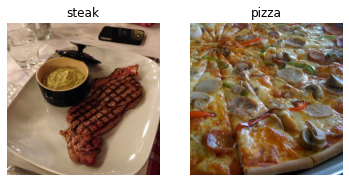

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define our directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10000 images at once, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10.000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10.000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data form directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images of the first batch
images[:2], images[0].shape

(array([[[[0.8117648 , 0.7490196 , 0.6862745 ],
          [0.8196079 , 0.7568628 , 0.69411767],
          [0.8196079 , 0.7568628 , 0.69411767],
          ...,
          [0.43921572, 0.3803922 , 0.30588236],
          [0.44705886, 0.38823533, 0.3137255 ],
          [0.44705886, 0.38431376, 0.32156864]],
 
         [[0.8117648 , 0.7490196 , 0.6862745 ],
          [0.82745105, 0.76470596, 0.7019608 ],
          [0.82745105, 0.76470596, 0.7019608 ],
          ...,
          [0.454902  , 0.38823533, 0.31764707],
          [0.454902  , 0.38823533, 0.31764707],
          [0.44705886, 0.3803922 , 0.31764707]],
 
         [[0.8196079 , 0.75294125, 0.6901961 ],
          [0.8313726 , 0.76470596, 0.7019608 ],
          [0.8235295 , 0.7607844 , 0.69803923],
          ...,
          [0.454902  , 0.38823533, 0.30980393],
          [0.45882356, 0.3921569 , 0.32156864],
          [0.45882356, 0.3921569 , 0.32941177]],
 
         ...,
 
         [[0.9843138 , 0.44705886, 0.42352945],
          [0.96470

In [ ]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a 3 layer convolutional  network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the nuimber of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding windows takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_4.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 259ms/step - loss: 0.8235 - accuracy: 0.6187 - val_loss: 0.5398 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4348 - accuracy: 0.8047 - val_loss: 0.4249 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3009 - accuracy: 0.8833 - val_loss: 0.4677 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 11s 224ms/step - loss: 0.1741 - accuracy: 0.9427 - val_loss: 0.4349 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.0619 - accuracy: 0.9887 - val_loss: 0.4855 - val_accuracy: 0.8020


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

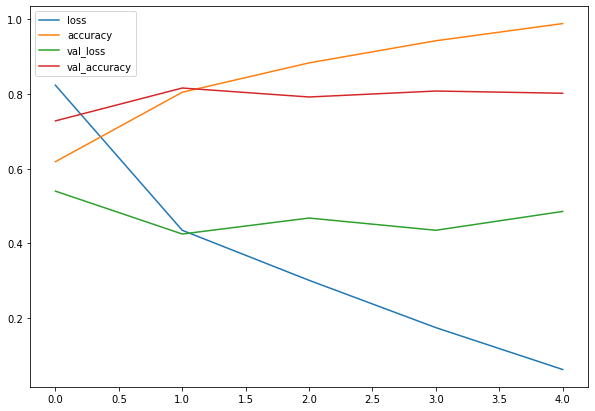

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    
    
    """
    Returns separate loss curves for training and validation metrics.
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # how many epochs we ran through

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


> **Note:** When a model's **validation loss start to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

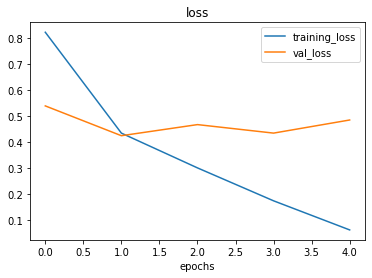

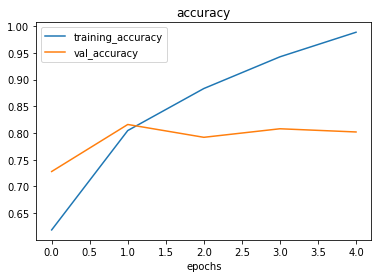

In [ ]:
# Check out the loss and accuracy of model 4:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number os conv layers
* Increase the number of conv filters 
* Add another dense layers to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (suck as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 0.6168 - accuracy: 0.6347 - val_loss: 0.4927 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4528 - accuracy: 0.7887 - val_loss: 0.3828 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4162 - accuracy: 0.8100 - val_loss: 0.3994 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4038 - accuracy: 0.8227 - val_loss: 0.3658 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3738 - accuracy: 0.8440 - val_loss: 0.3253 - val_accuracy: 0.8700


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

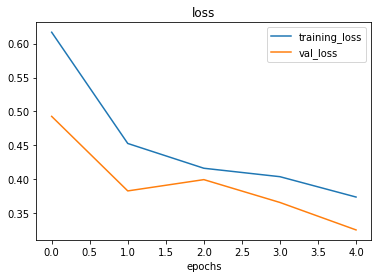

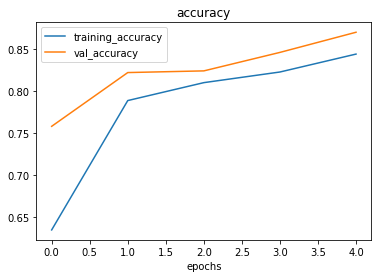

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageData Generator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             shear_range=0.2, # how much do you want to shear an image? 
                                             zoom_range=0.2, # zoom in randomly
                                             width_shift_range=0.2, # move your image around in the x axis
                                             height_shift_range=0.3, # move your image around in the y axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 26


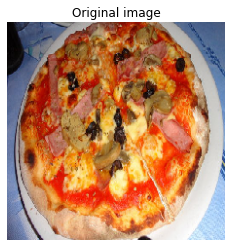

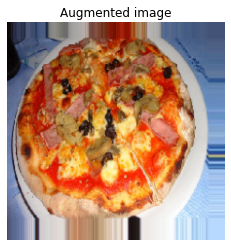

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 533ms/step - loss: 0.7134 - accuracy: 0.4980 - val_loss: 0.6912 - val_accuracy: 0.5700
Epoch 2/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6981 - accuracy: 0.4587 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6912 - accuracy: 0.5020 - val_loss: 0.6782 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6861 - accuracy: 0.5113 - val_loss: 0.6737 - val_accuracy: 0.5880
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6623 - accuracy: 0.6127 - val_loss: 0.7581 - val_accuracy: 0.5000


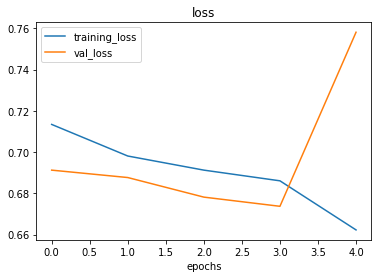

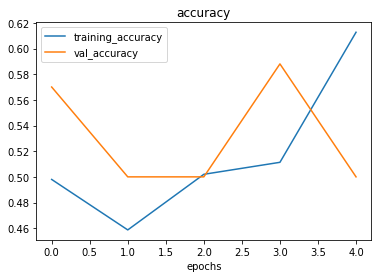

In [ ]:
# Check the model's training curve
plot_loss_curves(history_6)

Let's shuffle our augmented training data and traing another model (the same as before) and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            shuffle=True) # shuffle it this time


Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 538ms/step - loss: 0.6710 - accuracy: 0.6000 - val_loss: 0.6130 - val_accuracy: 0.5720
Epoch 2/5
 6/47 [==>...........................] - ETA: 19s - loss: 0.6451 - accuracy: 0.5798

KeyboardInterrupt: ignored

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

> **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it o learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Practice:** Recreate the model on the CNN explainer website (same as ``model_1``) and see how it performs on the augmented shuffled training data.

In [ ]:
# Model 1

model_8 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["Accuracy"])

# Fit the model
model_8.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

NameError: ignored

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

In [ ]:
# View our example image
!wget "https://www.seriouseats.com/thmb/-KA2hwMofR2okTRndfsKtapFG4Q=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/__opt__aboutcom__coeus__resources__content_migration__serious_eats__seriouseats.com__recipes__images__2015__05__Anova-Steak-Guide-Sous-Vide-Photos15-beauty-159b7038c56a4e7685b57f478ca3e4c8.jpg"



In [ ]:
# View our example image
steak = mpimg.imread("steak.jpg")
plt.imshow(steak)

In [ ]:
# Check the shape of our image
steak.shape
tf.constant(steak)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

> **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor 
    and reshapes it to (img_shape, img_shape, colour_channels).
    """
    
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image(get all values between 0 and 1)
    img = img/255.
    return img


In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("steak.jpg")

In [ ]:
plt.imshow(steak)

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
def decipher_pred(pred):
    pred_class = class_names[int(tf.round(pred))]
    return pred_class

In [ ]:
# bringing new pics 
!wget "https://www.receitasnestle.com.br/sites/default/files/srh_recipes/86f7100c92218a97fac8e3bbd18ed787.jpg"
!wget "https://media.istockphoto.com/id/1135308302/photo/broccoli-on-white.jpg?s=612x612&w=0&k=20&c=ONhL9A0yMth8m-83Z8eAwzAsDeKU81IcpZc-2rVDMJo="


In [ ]:
class_names = ["pizza", "steak"]
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [ ]:
# Test our model on  a custom image
pred_and_plot(model_8, "steak.jpg")

Our model works! Let's try it on another image... this time pizza

In [ ]:
# Download another test custom image and make a prediction on it
!wget "https://images.immediate.co.uk/production/volatile/sites/2/2020/02/OLI-0320_Healthy-CuminCrustedChickenBreastWithKaleSaladHumous_02786_preview-eba91c9.jpg?quality=90&resize=556,505"

In [ ]:
pred_and_plot(model_8, "dinnerpic.jpg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied


## 1. Import and become one with the data

In [ ]:
import zipfile
! wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2022-12-08 15:28:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   138MB/s    in 3.6s    

2022-12-08 15:28:28 (138 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['163637.jpg']
Image shape: (512, 382, 3)


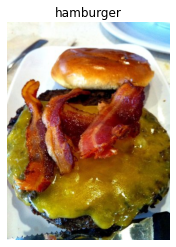

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about a CNN Explainer website...
how about we just take their model (also on 10 classes) and use it for our problem?...


In [ ]:
# Create our model 
model_8 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0011),
                metrics=["accuracy"])

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


### 4. Fit a model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data_augmented, # now 10 different classes
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 115s 486ms/step - loss: 2.3408 - accuracy: 0.0945 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 114s 487ms/step - loss: 2.3044 - accuracy: 0.0995 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 112s 479ms/step - loss: 2.3049 - accuracy: 0.0977 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 113s 480ms/step - loss: 2.3043 - accuracy: 0.0991 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 115s 490ms/step - loss: 2.3046 - accuracy: 0.0956 - val_loss: 2.3034 - val_accuracy: 0.1000


### 5. Evaluate the model

In [ ]:
import pandas as pd

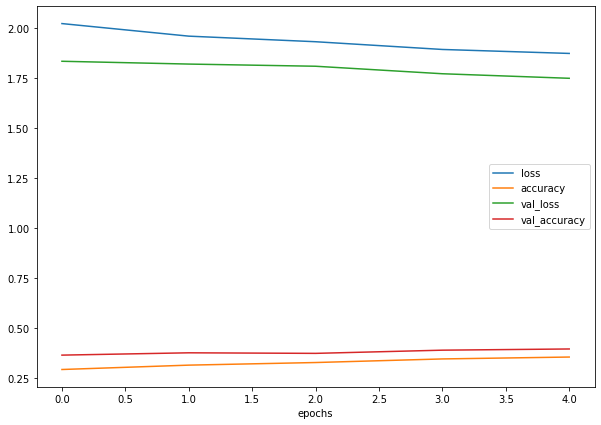

In [ ]:
pd.DataFrame(history_8.history).plot(figsize=(10, 7), xlabel="epochs")

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 3.9916 - accuracy: 0.2824


[3.991563558578491, 0.2824000120162964]

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Learning rate vs loss')

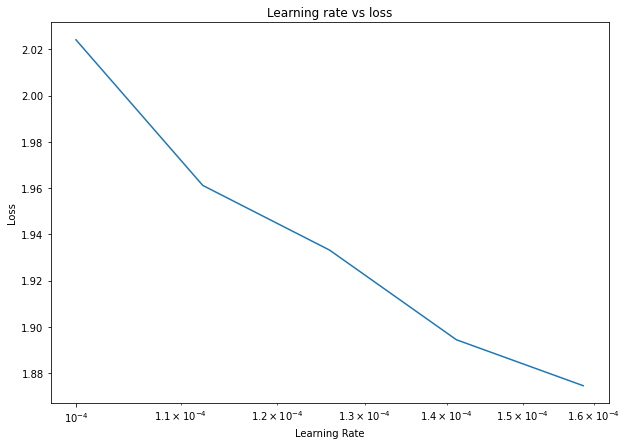

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(5)/ 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

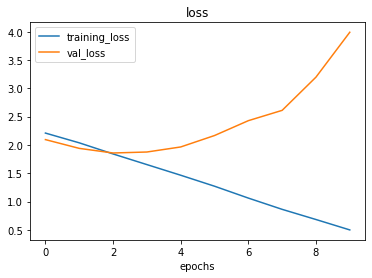

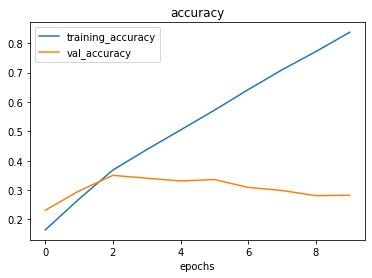

In [ ]:
 # Check outthe model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data, but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting). 

So, let's tru and fix overfitting by...
* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transer learning leverages the patterns another model has learned on simlar data to your own and allows you to use those patterns on your own dataset

In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 conv layers...
model_9 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="CategoricalCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

235/235 [==============================] - 51s 216ms/step - loss: 2.1573 - accuracy: 0.2308 - val_loss: 2.0064 - val_accuracy: 0.2792


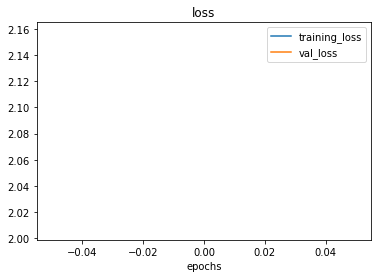

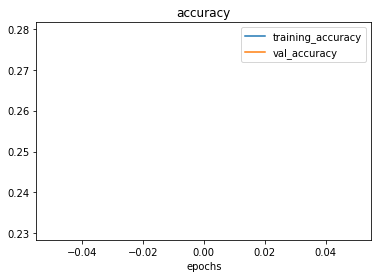

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf

In [ ]:
# Create a model to fit it with the augmented data
model_10 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="CategoricalCrossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
# Check out our model trained on augmented loss curves on augmented data
plot_loss_curves(history_10)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied 

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters
- training for longer (e.g 10 epochs instead of 5 epochs)
- try **transfer learning** 

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-12-02 16:11:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.03s   

2022-12-02 16:11:00 (132 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-12-02 16:11:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images


def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]


    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 15ms/step


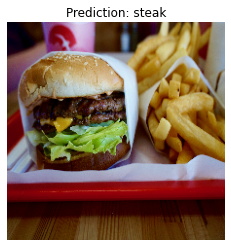

In [ ]:
# Make a prediction using model_10
pred_and_plot(model_10, "03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

### Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 1.7874 - accuracy: 0.3924


[1.7874287366867065, 0.39239999651908875]

In [ ]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

# Exercises

1. Creating a model to distinguish between 'Lontrinhas' and 'Furoezinhos'


In [ ]:
# First, load the data
import zipfile

# Unzip the uploaded file
zip_ref = zipfile.ZipFile("lontra_fura.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
# Walk through the data
for dirpath, dirnames, filenames in os.walk("lontra_fura"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'lontra_fura'.
There are 2 directories and 0 images in 'lontra_fura/train'.
There are 0 directories and 13 images in 'lontra_fura/train/furao'.
There are 0 directories and 13 images in 'lontra_fura/train/lontra'.
There are 2 directories and 0 images in 'lontra_fura/test'.
There are 0 directories and 3 images in 'lontra_fura/test/furao'.
There are 0 directories and 3 images in 'lontra_fura/test/lontra'.


['download (2).jpg']
Image shape: (183, 275, 3)


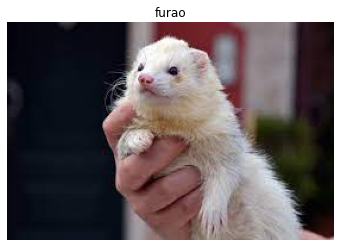

In [ ]:
img = view_random_image("lontra_fura/train/", "furao")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(69)

# Normalize our data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to our data
train_dir = "lontra_fura/train"
test_dir = "lontra_fura/test"

# Turn our data into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                batch_size=2,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=69)
test_data = test_datagen.flow_from_directory(test_dir,
                                            batch_size=2,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=69)

Found 26 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
tf.shape(test_data)

ValueError: ignored

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [ ]:
# Create the model!
tf.random.set_seed(69)

model_furontras = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_furontras.compile(loss="BinaryCrossentropy",
                        optimizer="adam",
                        metrics=["accuracy"])

# Fit the model
history_furontras = model_furontras.fit(train_data,
                                        steps_per_epoch=len(train_data),
                                        epochs=10,
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/10
13/13 [==============================] - 3s 85ms/step - loss: 0.7265 - accuracy: 0.4615 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 1s 80ms/step - loss: 0.6315 - accuracy: 0.5769 - val_loss: 0.6105 - val_accuracy: 0.8333
Epoch 3/10
13/13 [==============================] - 0s 36ms/step - loss: 0.4699 - accuracy: 0.7308 - val_loss: 0.5443 - val_accuracy: 0.8333
Epoch 4/10
13/13 [==============================] - 0s 37ms/step - loss: 0.2543 - accuracy: 0.8846 - val_loss: 1.1027 - val_accuracy: 0.5000
Epoch 5/10
13/13 [==============================] - 0s 38ms/step - loss: 0.2440 - accuracy: 0.8462 - val_loss: 0.4657 - val_accuracy: 0.8333
Epoch 6/10
13/13 [==============================] - 1s 41ms/step - loss: 0.1155 - accuracy: 1.0000 - val_loss: 0.3270 - val_accuracy: 0.8333
Epoch 7/10
13/13 [==============================] - 0s 36ms/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 0.1596 - val_accuracy: 0.8333
Epoch 8/10
13

In [ ]:
model_furontras.evaluate(test_data)

3/3 [==============================] - 0s 78ms/step - loss: 0.0457 - accuracy: 1.0000


[0.04569423198699951, 1.0]

In [ ]:
load_and_prep_image("t1.jpg")
load_and_prep_image("t2.jpg")

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3882353 , 0.39215687, 0.32941177],
        [0.39156163, 0.3954832 , 0.3327381 ],
        [0.39607844, 0.4       , 0.3372549 ],
        ...,
        [0.39215687, 0.4       , 0.3137255 ],
        [0.3930672 , 0.40091035, 0.31463584],
        [0.3930672 , 0.40091035, 0.31463584]],

       [[0.3882353 , 0.39215687, 0.32941177],
        [0.39156163, 0.3954832 , 0.3327381 ],
        [0.39607844, 0.4       , 0.3372549 ],
        ...,
        [0.39215687, 0.4       , 0.3137255 ],
        [0.39667368, 0.40451682, 0.32216388],
        [0.39667368, 0.40246758, 0.3262623 ]],

       [[0.3882353 , 0.39215687, 0.32941177],
        [0.39156163, 0.3954832 , 0.3327381 ],
        [0.39607844, 0.4       , 0.3372549 ],
        ...,
        [0.39215687, 0.4       , 0.3137255 ],
        [0.39968485, 0.40360644, 0.33483902],
        [0.39968485, 0.40360644, 0.3414916 ]],

       ...,

       [[0.93396354, 0.9418067 , 0.8558473 ],
        [0.93

1/1 [==============================] - 0s 17ms/step


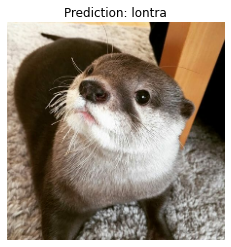

In [ ]:
pred_and_plot(model_furontras, "t4.jpg", class_names=["furao", "lontra"])

1/1 [==============================] - 0s 17ms/step


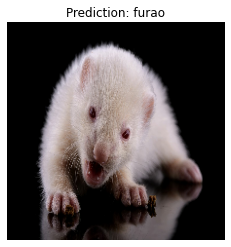

In [ ]:
pred_and_plot(model_furontras, "t5.jpg", class_names=["furao", "lontra"])